# Задание 2

В рамках второго задания был взят новый датасет, который больше относится к бизнесу. 
В применяемом датасете собрана информация о рынке телевизоров (своеобразный конкурентный анализ). 
У нас есть: 
- Brand - комания-производитель телевизоров 
- Resolution - тип дисплея 
- Size - размер 
- Selling Price - цена товара при продаже 
- Original Price - цена товара при производстве 
- Operating System - операционная система 
- Rating - рейтинг товара 

Данный датасет может быть полезен при анализе трендов на рынке. Можно выявить, насколько размер или рейтинг влияет на цену товара, какие компании самые дорогие, а какие находятся в топе рейтинга. 
Информация будет ценной для компаний, которые хотят выйти на рынок или укрепить свои текущие позиции. 
В плане анализа датасет подходит, у него несколько столбцов с числовыми показателями. Только в конце при построении регрессии данных немного не хватит. 
Задание было выполнено на основе курса, основная цель - понять все аспекты анализа и применить на практике.

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/nastyaproduction/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


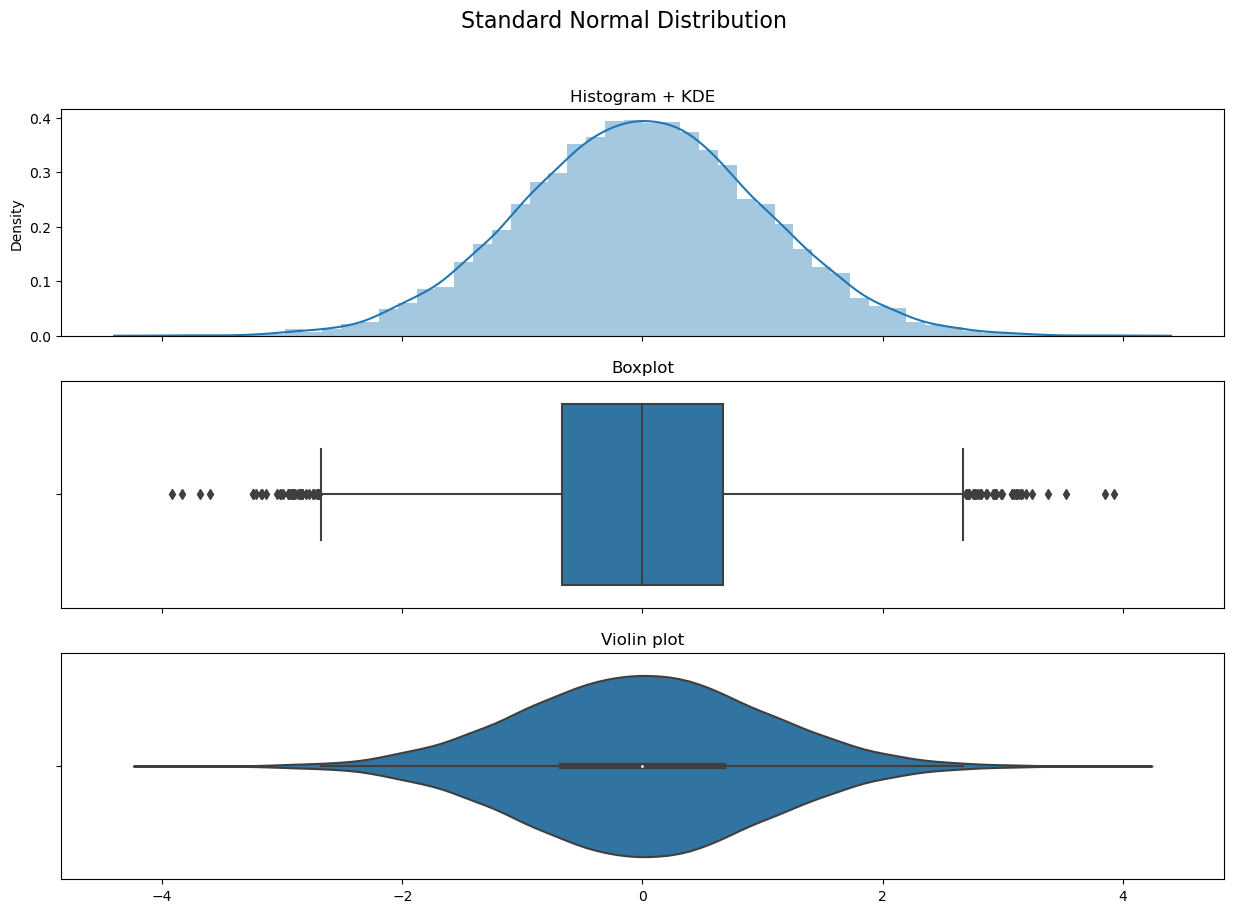

In [9]:
#Начнем с рассмотрения материалов курса и попробуем оценить графики в целом без применения датасета
#Сгенерируем случайные данные 
#Построим три графика: гистограмму, ящик-с-усами и скрипичный график 
#Мы сможем посмотреть, смещено ли распределение, нормальное ли оно

N = 10 ** 4
np.random.seed(42)

def plot_comparison(x, title):
    fig, ax = plt.subplots(3, 1, sharex=True, figsize=(15,10))
    sns.distplot(x, ax=ax[0])
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x=x, ax=ax[1])
    ax[1].set_title('Boxplot')
    sns.violinplot(x=x, ax=ax[2])
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.show()
    
sample_gaussian = np.random.normal(size=N)
plot_comparison(sample_gaussian, 'Standard Normal Distribution')

/Users/nastyaproduction/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


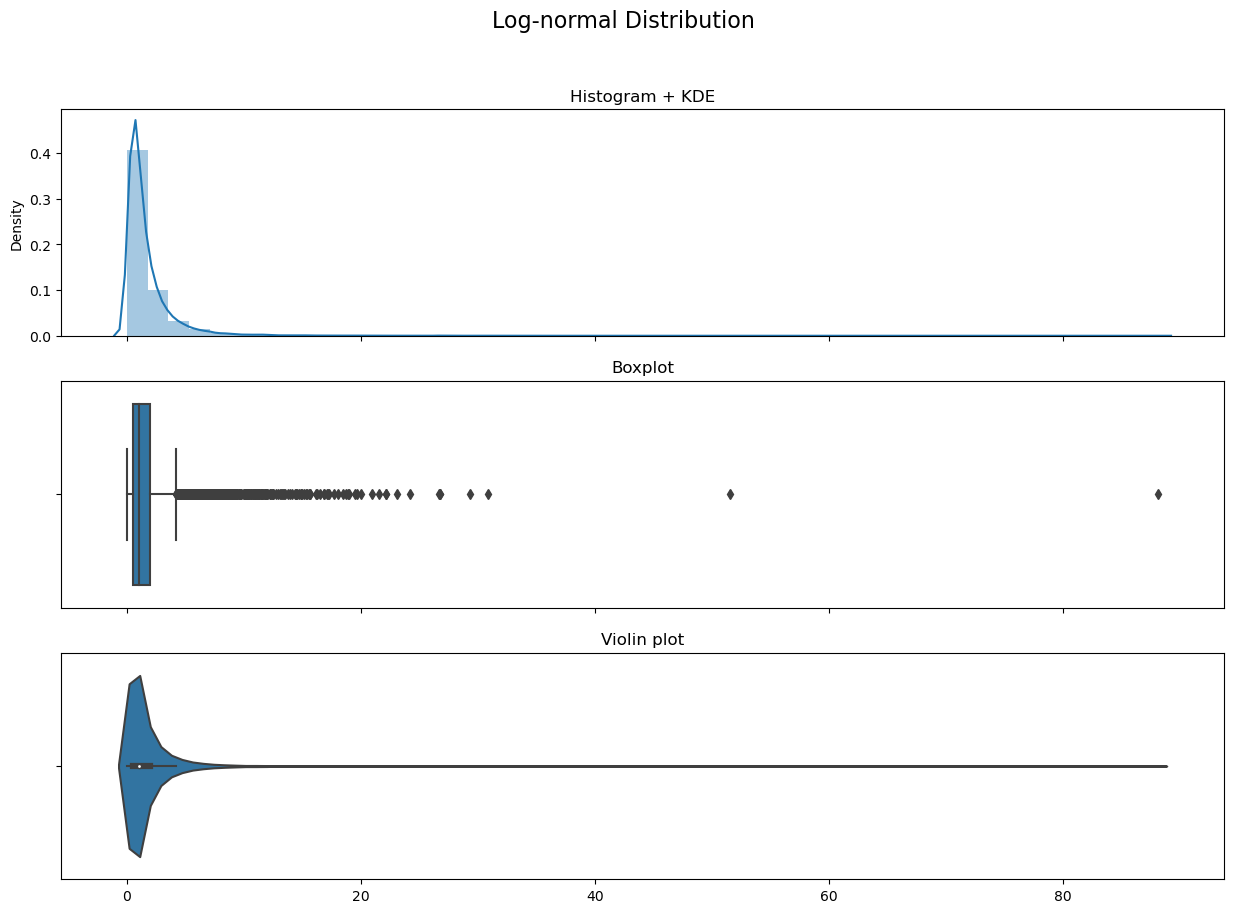

In [10]:
#По результатам выше распределение нормальное
#Как графики выглядят для нормального распределения, посмотрим по данной команде

sample_lognormal = np.random.lognormal(size=N)
plot_comparison(sample_lognormal, 'Log-normal Distribution')

/Users/nastyaproduction/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


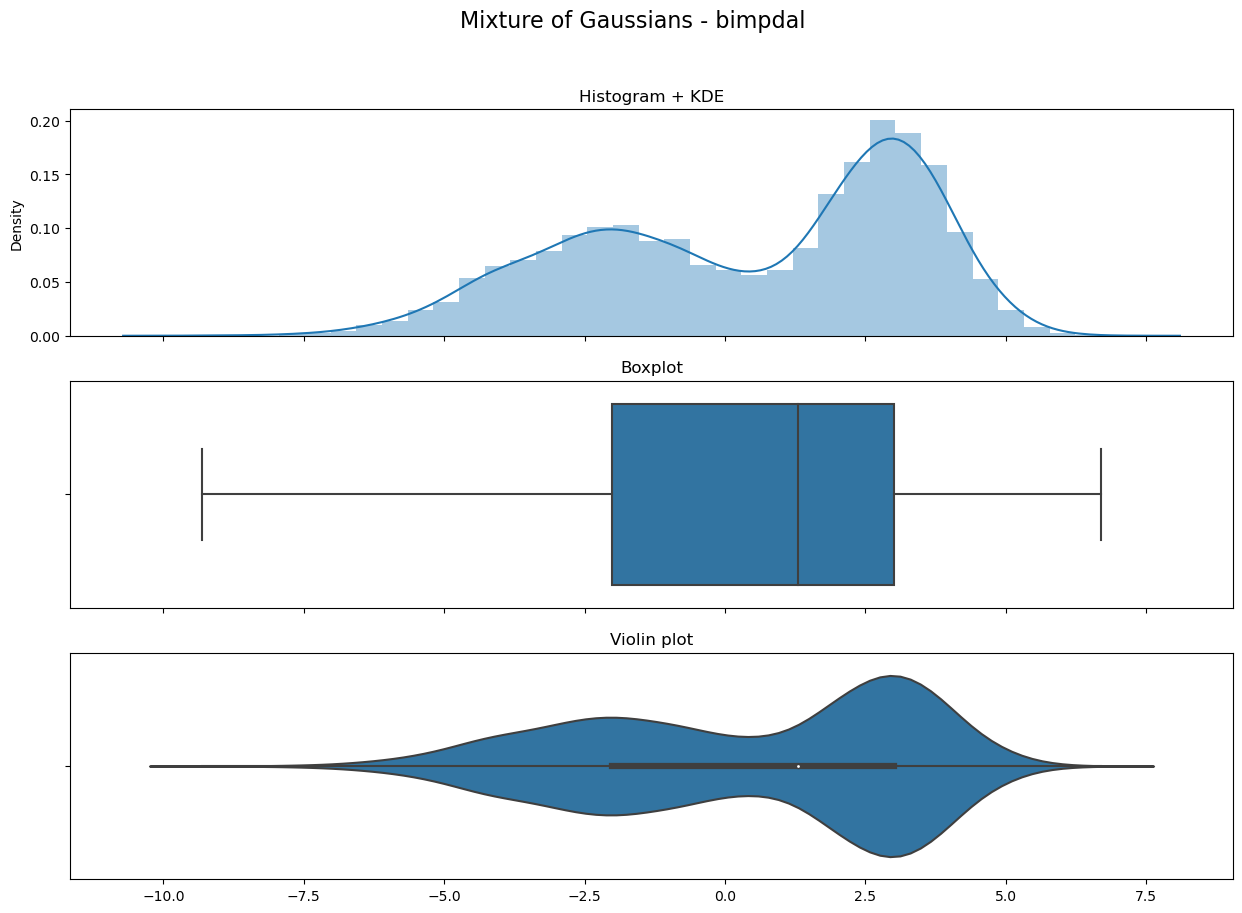

In [12]:
#Как графики выглядят для бимодального распределения, посмотрим по данной команде

sample_bimodal = np.concatenate([np.random.normal(loc=-2, scale=2, size=int(N/2)),
                                                 np.random.normal(loc=3, scale=1, size=int(N/2))])
plot_comparison(sample_bimodal, 'Mixture of Gaussians - bimpdal')

# Разведочный анализ данных

In [276]:
#Теперь приступим к исследованию датасета

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import statsmodels.api as sm

df = pd.read_csv('TV_Final.csv')
df.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3


/Users/nastyaproduction/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Rating', ylabel='Density'>

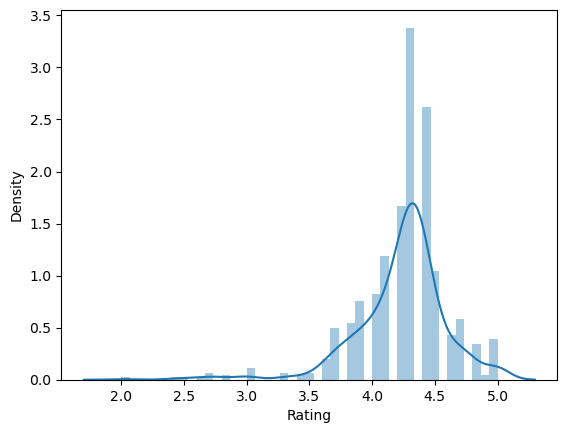

In [277]:
#При помощи гистограммы рассмотрим распределение рейтинга телевизоров

sns.distplot(df['Rating'])

In [278]:
#По графику видно, что чаще всего пользователи оценивали телевизоры между 4 и 5 
#Теперь создадим распределение для построения следующего графика 

df['Operating System'].value_counts()

Android      474
Tizen        145
Linux        127
WebOS        109
HomeOS        28
VIDAA         13
FireTV OS      5
Name: Operating System, dtype: int64

<AxesSubplot:ylabel='Operating System'>

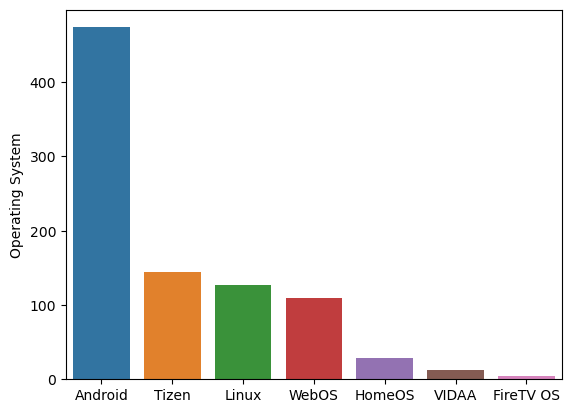

In [279]:
#Построим график распределения

sns.barplot(x=df['Operating System'].value_counts().index, y=df['Operating System'].value_counts())

<AxesSubplot:xlabel='Operating System', ylabel='Original Price'>

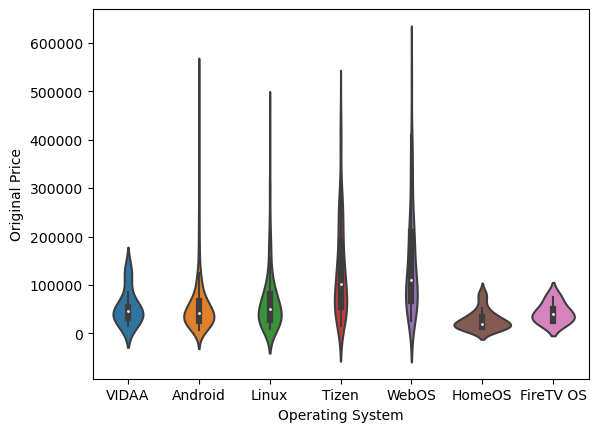

In [280]:
#Как видно из графика, наиболее популярная операционная система среди телевизоров – Android
#Теперь построим скрипичный график – посмотрим распределение операционных систем по цене

sns.violinplot(x=df['Operating System'], y=df['Original Price'])

<AxesSubplot:xlabel='Operating System', ylabel='Original Price'>

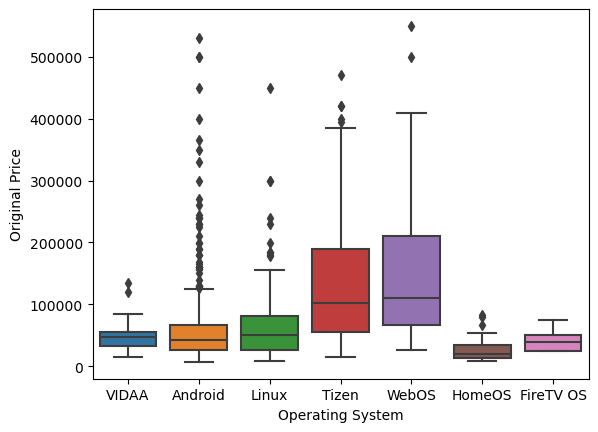

In [281]:
#Исходя из графика, можно сделать вывод, что распределение цен по каждой операционной системе находится примерно в одном ценовом диапазоне, но у четырех есть достаточно большие отклонения в пользу высоких цен
#Теперь построим в виде ящика-с-усами 

sns.boxplot(x=df['Operating System'], y=df['Original Price'])

In [282]:
#Данные те же, но представлены в другом виде, поэтому новых инсайтов мы тут не видим 
#Теперь построим тепловую карту корреляций – 
#Сначала выделим количественные переменные из датасета 

num_features = ['Size ', 'Selling Price', 'Original Price', 'Rating']

In [283]:
#Теперь строим таблицу корреляций 

correlation = df.corr().loc[num_features, num_features]
correlation

,Size,Selling Price,Original Price,Rating
Size,1.000000,0.662693,0.730084,0.223092
Selling Price,0.662693,1.000000,0.939933,0.180150
Original Price,0.730084,0.939933,1.000000,0.174214
Rating,0.223092,0.180150,0.174214,1.000000


<AxesSubplot:>

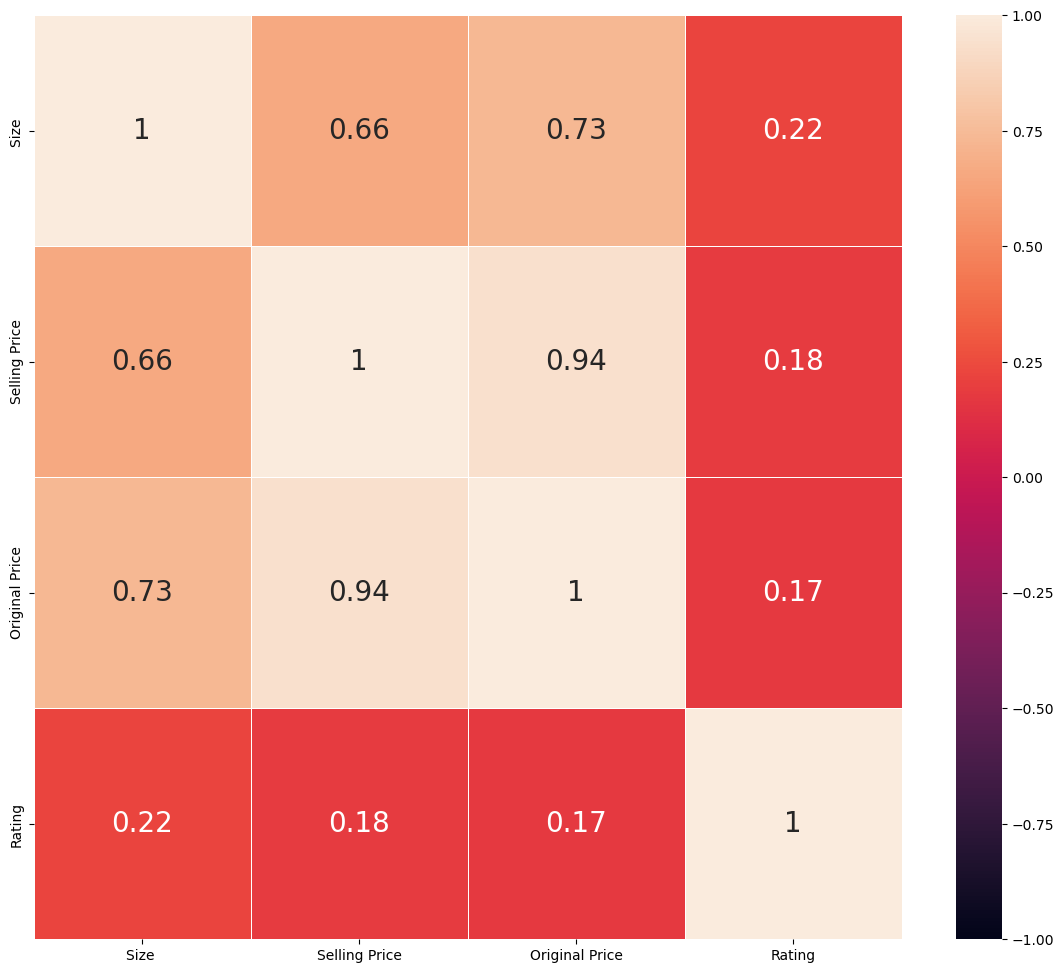

In [284]:
#Теперь мы можем построить тепловую карту 

fig, ax = plt.subplots(figsize = (14,12))

sns.heatmap(correlation, annot=True, linecolor='white', linewidth=0.5,
           annot_kws = {'size':20}, vmax = 1, vmin = -1)

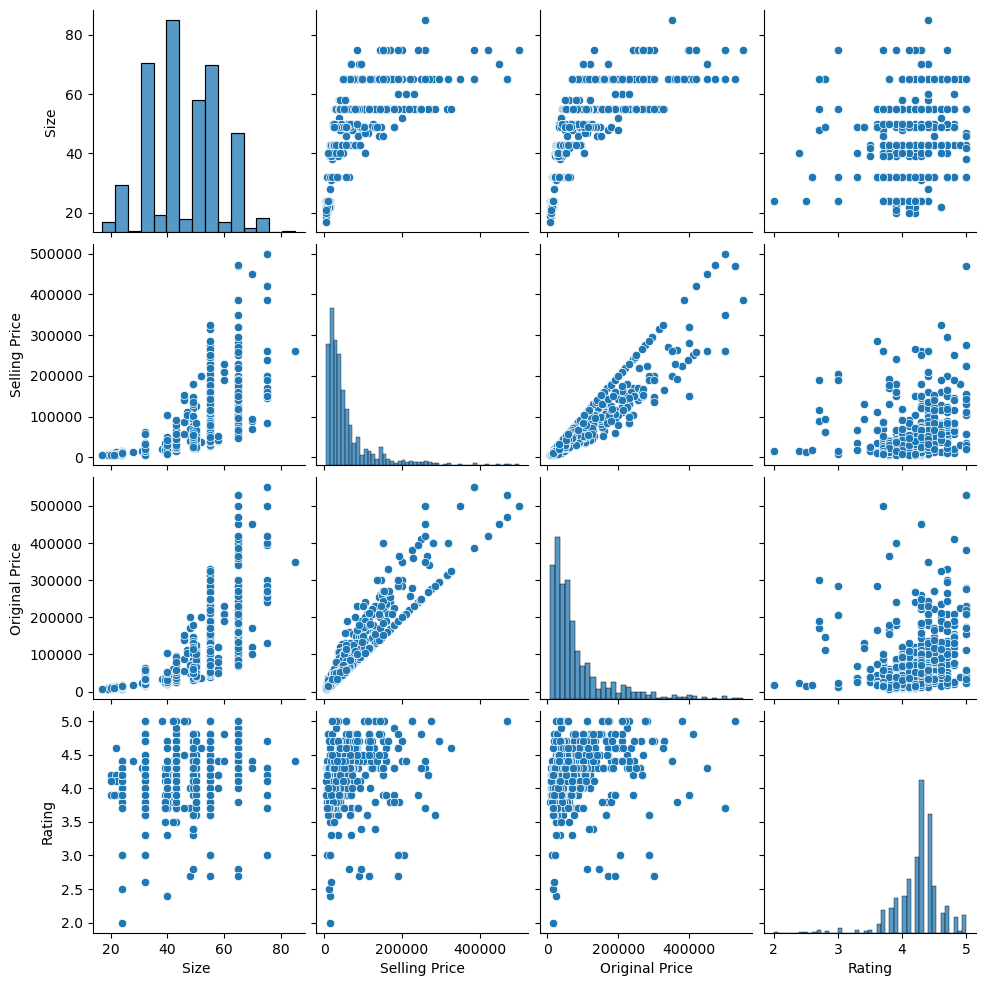

In [285]:
#Как видно из карты, отрицательной корреляции нет, все показатели более-менее зависят друг от друга 
#Построим график рассеяния 

sns.pairplot(df[num_features])

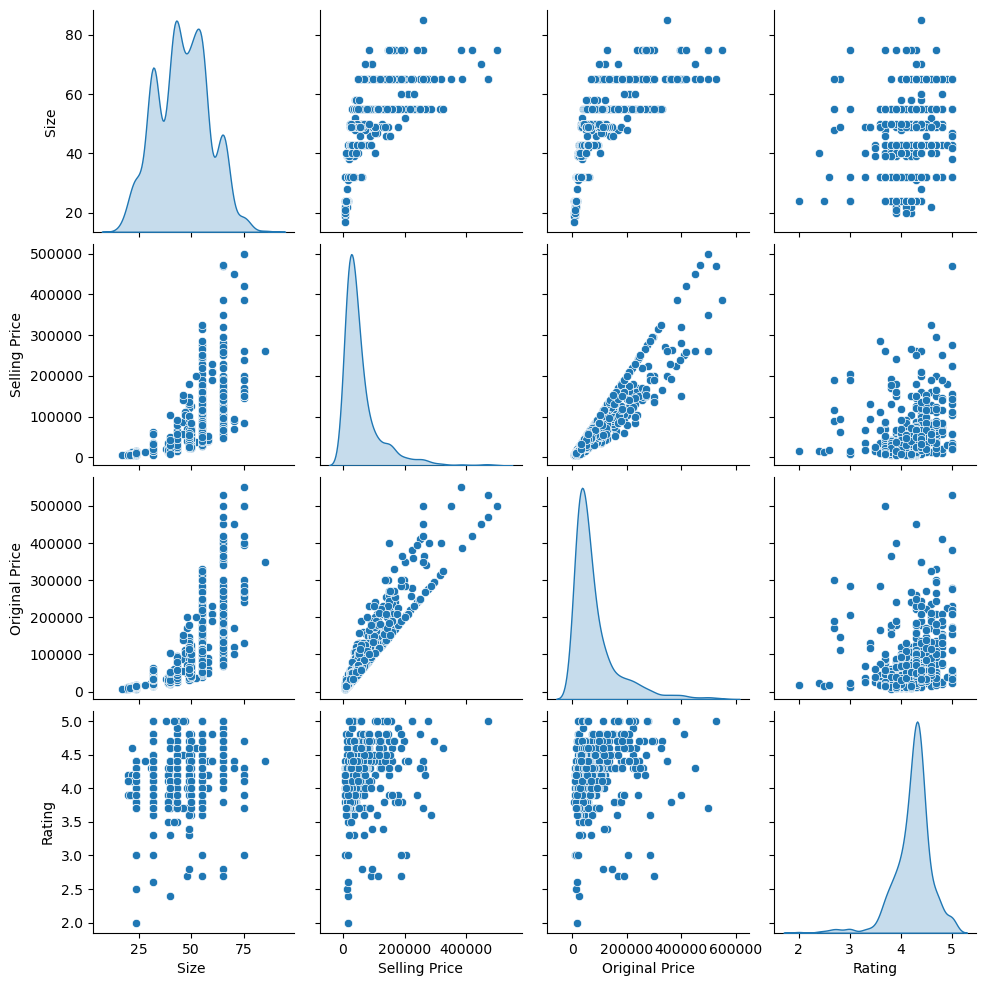

In [286]:
#Добавим дополнительный параметр, чтобы получить график ядерной оценки плотности
#Данные так же не меняются, но теперь мы можем детально рассмотреть каждую корреляцию 
#Интересны связи между ценой и рейтингом, ценой и размером

sns.pairplot(df[num_features], diag_kind='kde')

In [287]:
#Теперь построим много графиков сразу 
#Выделим отдельно категориальные переменные 

cat_features = ['Brand', 'Resolution', 'Operating System']

In [288]:
#Приведем датасет к нужному виду 

df_melted = pd.melt(df, id_vars='Rating', value_vars=cat_features)

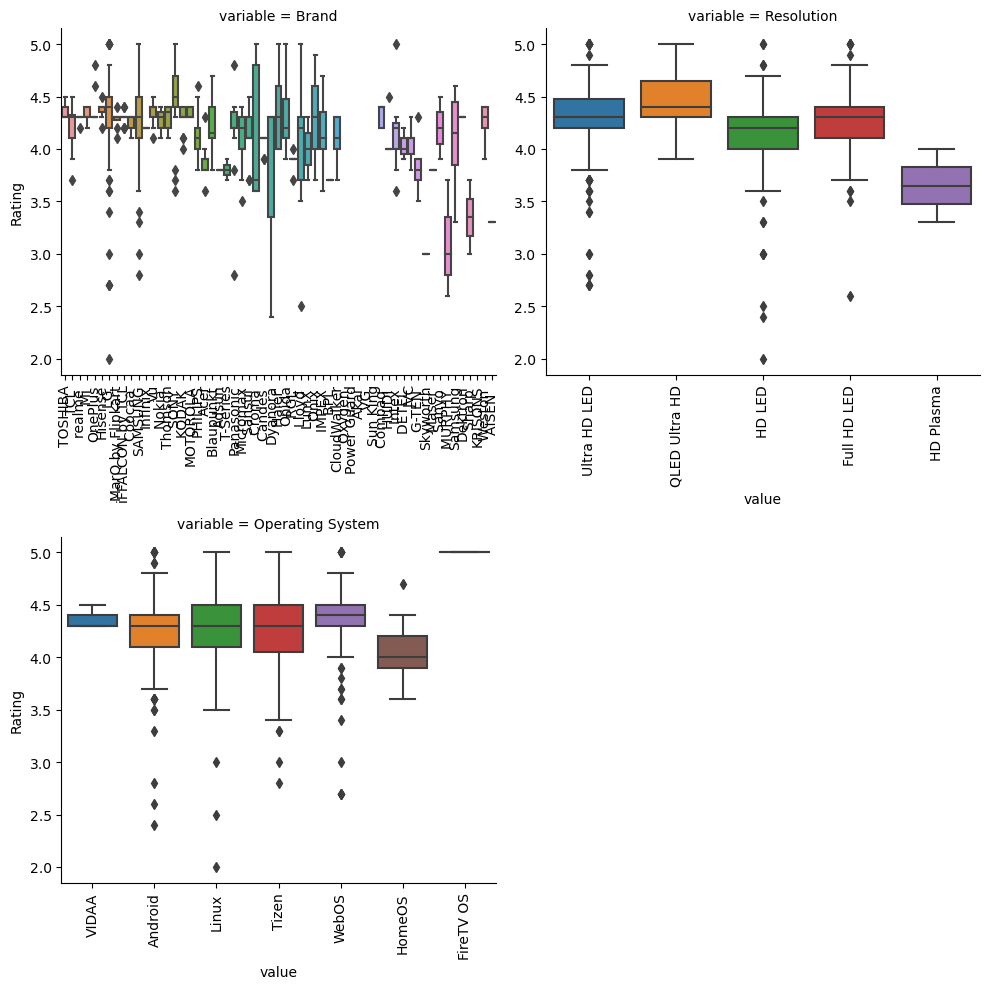

In [289]:
#Построим ящики-с-усами для всех переменных 

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
g = sns.FacetGrid(df_melted, col="variable",
                 col_wrap=2, sharex=False, sharey=False, height=5)
g.map(boxplot, 'value', 'Rating')

In [290]:
#Так как в датасете три качественные переменные, графика тоже три. 
#Интересно, что некоторые бренды имеют компьютеры с явным низким рейтингом, дисплеи тоже имеют разброс, а операционные системы находятся почти в одном и том же диапазоне

# Визуализация с Plotly

In [291]:
!pip install plotly==4.14.3
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

tv = pd.read_csv('TV_Final.csv')
tv.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3


In [292]:
#Узнаем, сколько всего у нас есть брендов телевизоров

len(tv['Brand'].unique())

59

In [293]:
#Достаточно много – 59
#Теперь узнаем про размеры

len(tv['Size '].unique())

27

In [294]:
#27 разных размеров телевизоров
#По примеру с курса возьмем один бренд и проанализируем его телевизоры

toshiba = tv[tv['Brand'] == 'TOSHIBA']
toshiba

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
19,TOSHIBA,Ultra HD LED,43,27999,39990,VIDAA,4.3
26,TOSHIBA,HD LED,32,12499,14990,VIDAA,4.4
132,TOSHIBA,Full HD LED,43,22499,26990,VIDAA,4.4
232,TOSHIBA,Ultra HD LED,50,33999,46990,VIDAA,4.3
234,TOSHIBA,HD LED,32,17499,18990,VIDAA,4.3
487,TOSHIBA,Ultra HD LED,65,63999,119999,VIDAA,NaN
529,TOSHIBA,Ultra HD LED,55,40599,50999,VIDAA,4.3
618,TOSHIBA,Ultra HD LED,43,28999,38999,VIDAA,NaN
876,TOSHIBA,Full HD LED,43,24999,31990,VIDAA,NaN


In [295]:
trace = go.Bar(x=toshiba['Original Price'], y=toshiba['Size '])

layout = go.Layout(title='Prices and sizes of TOSHIBA televisors')

fig = go.Figure(data=trace, layout=layout)
fig

In [296]:
toshiba.sort_values(by='Original Price', ascending=True)
toshiba_sort = toshiba.sort_values(by='Original Price', ascending=True)
toshiba_sort

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
26,TOSHIBA,HD LED,32,12499,14990,VIDAA,4.4
234,TOSHIBA,HD LED,32,17499,18990,VIDAA,4.3
132,TOSHIBA,Full HD LED,43,22499,26990,VIDAA,4.4
876,TOSHIBA,Full HD LED,43,24999,31990,VIDAA,NaN
618,TOSHIBA,Ultra HD LED,43,28999,38999,VIDAA,NaN
19,TOSHIBA,Ultra HD LED,43,27999,39990,VIDAA,4.3
232,TOSHIBA,Ultra HD LED,50,33999,46990,VIDAA,4.3
529,TOSHIBA,Ultra HD LED,55,40599,50999,VIDAA,4.3
878,TOSHIBA,Full HD LED,49,29999,51999,VIDAA,NaN
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3


In [297]:
#Как видно из графика, цена на телевизоры растет вместе с размером товара
#Теперь отобразим те же данные в виде графика рассеяния

trace = go.Scatter(x=toshiba_sort['Original Price'], y=toshiba_sort['Size '])

layout = go.Layout(title='Prices and sizes of TOSHIBA televisors', 
                  yaxis={'range':[0,90]})

fig = go.Figure(data=trace, layout=layout)
fig

In [298]:
#После сортировки данных по цене получилось сделать график рассеяния (без сортировки линия тренда была слишком кривой)
#Данные отображены те же, видим, что цена растет вместе с размером телевизора
#Теперь для нового графика добавим еще один бренд

nokia = tv[tv['Brand'] == 'Nokia ']
nokia

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
36,Nokia,Ultra HD LED,43,32999,48999,Android,4.4
38,Nokia,Ultra HD LED,50,39999,59999,Android,4.4
46,Nokia,Ultra HD LED,43,31999,45999,Android,4.1
50,Nokia,Ultra HD LED,55,44999,62999,Android,4.4
70,Nokia,QLED Ultra HD,55,54999,79999,Android,4.2
81,Nokia,Ultra HD LED,55,39999,59999,Android,4.3
85,Nokia,HD LED,32,16499,19999,Android,4.3
91,Nokia,Ultra HD LED,50,35999,54999,Android,4.3
137,Nokia,Full HD LED,43,26999,39999,Android,4.2
142,Nokia,Ultra HD LED,55,44999,59999,Android,4.1


In [299]:
nokia.sort_values(by='Original Price', ascending=True)
nokia_sort = nokia.sort_values(by='Original Price', ascending=True)
nokia_sort

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
85,Nokia,HD LED,32,16499,19999,Android,4.3
137,Nokia,Full HD LED,43,26999,39999,Android,4.2
46,Nokia,Ultra HD LED,43,31999,45999,Android,4.1
36,Nokia,Ultra HD LED,43,32999,48999,Android,4.4
91,Nokia,Ultra HD LED,50,35999,54999,Android,4.3
38,Nokia,Ultra HD LED,50,39999,59999,Android,4.4
81,Nokia,Ultra HD LED,55,39999,59999,Android,4.3
142,Nokia,Ultra HD LED,55,44999,59999,Android,4.1
50,Nokia,Ultra HD LED,55,44999,62999,Android,4.4
70,Nokia,QLED Ultra HD,55,54999,79999,Android,4.2


In [300]:
trace0 = go.Scatter(x=toshiba_sort['Original Price'], y=toshiba_sort['Size '], 
                   name='TOSHIBA')

trace1 = go.Scatter(x=nokia_sort['Original Price'], y=nokia_sort['Size '],
                   name='Nokia')

layout = go.Layout(title='Prices and sizes of TOSHIBA and Nokia televisors')

fig = go.Figure(data=[trace0, trace1], layout=layout)
fig

In [301]:
#Так как в датасете нет информации о странах, часть графиков с локациями придется пропустить
#Могу сказать, что этот материал был у меня на курсе Tableau, поэтому я имею о таких графиках представление
#Теперь сделаем график рассеяния с учетом трех переменных

trace0 = go.Scatter(
    x = toshiba_sort['Rating'],
    y = toshiba_sort['Original Price'],
    mode = 'markers',
    marker = dict(size = toshiba_sort['Size ']/1,
                 opacity = 0.7,
                 showscale = False),
    text = toshiba_sort['Size '],
    hovertemplate = 
    '<b>%{text}</b>' + 
    '<br><i>Rating</i>: %{x}' +
    '<br><i>Price</i>: %{y}',
    )

layout = go.Layout(title='Rating and Price',
                  xaxis=dict(
                  title='Rating',
                  type='log'),
                  yaxis=dict(
                  title='Price'))

fig = go.Figure(data = [trace0], layout = layout)
fig

In [302]:
#Из графика видно, что цена растет вместе с размером экрана
#Также, мы видим, что рейтинг от размера не зависит
#Теперь сделаем график по ситуации со всеми брендами и с анимацией

px.scatter(tv, x='Rating', y='Original Price', size='Size ', log_x=True,
          animation_frame='Brand', size_max=55)

In [303]:
#Так как переменные в датасете не очень динамичные, мы не можем оценить именно плавность анимации, но в любом случае график получился информативным
#Мы видим, что у каждого бренда есть телевизоры с разным рейтингом и в разном ценовом сегменте

# Критерий Хи-Квадрат

In [304]:
#Сначала подготовим датасет
#В моем датасете нет бинарных переменных, а они мне нужны, так мне будет легче усвоить материал
#Создадим бинарные переменные 
#Big - большой или маленький телевизор 
#Expensive - дорогой или дешевый телевизор
#И сформулируем сразу нулевую гипотезу: размер телевизора не влияет на его цену

tv['Big'] = tv['Size '].apply(lambda x: 1 if x in range(50,200) else 0)

In [305]:
tv.head(20)

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating,Big
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3,1
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4,1
2,realme,HD LED,32,13999,17999,Android,4.3,0
3,Mi,HD LED,32,14999,19999,Android,4.4,0
4,realme,HD LED,32,12999,21999,Android,4.3,0
5,OnePlus,HD LED,32,15999,19999,Android,4.3,0
6,OnePlus,Full HD LED,43,25999,29999,Android,4.3,0
7,TCL,Ultra HD LED,65,57999,119990,Android,4.2,1
8,Mi,Full HD LED,40,21999,29999,Android,4.3,0
9,realme,Ultra HD LED,43,26999,32999,Android,4.3,0


In [306]:
tv['Expensive'] = tv['Original Price'].apply(lambda x: 1 if x in range(100000,200000) else 0)

In [307]:
tv.head(20)

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating,Big,Expensive
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3,1,0
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4,1,1
2,realme,HD LED,32,13999,17999,Android,4.3,0,0
3,Mi,HD LED,32,14999,19999,Android,4.4,0,0
4,realme,HD LED,32,12999,21999,Android,4.3,0,0
5,OnePlus,HD LED,32,15999,19999,Android,4.3,0,0
6,OnePlus,Full HD LED,43,25999,29999,Android,4.3,0,0
7,TCL,Ultra HD LED,65,57999,119990,Android,4.2,1,1
8,Mi,Full HD LED,40,21999,29999,Android,4.3,0,0
9,realme,Ultra HD LED,43,26999,32999,Android,4.3,0,0


In [308]:
tv.to_csv('TV_Final_upd.csv', index=False)
tv.to_excel('TV_Final_upd.xlsx', index=False)
df = pd.read_csv('TV_Final_upd.csv')
df.info

<bound method DataFrame.info of        Brand     Resolution  Size   Selling Price  Original Price  \
0    TOSHIBA   Ultra HD LED     55          37999           54990   
1       TCL   QLED Ultra HD     55          52999          129990   
2    realme          HD LED     32          13999           17999   
3        Mi          HD LED     32          14999           19999   
4    realme          HD LED     32          12999           21999   
..       ...            ...    ...            ...             ...   
907    SONY     Full HD LED     43          44999           57900   
908    SONY     Full HD LED     40          41499           51900   
909    SONY    Ultra HD LED     65         149990          184990   
910    SONY          HD LED     32          32900           32900   
911    SONY     Full HD LED     43          56900           56900   

    Operating System  Rating  Big  Expensive  
0              VIDAA     4.3    1          0  
1            Android     4.4    1          1 

In [309]:
#Готово. Теперь сделаем сопряженную таблицу 

ct_o = df.groupby('Big')['Expensive'].value_counts().unstack()
ct_o

Expensive,0,1
Big,,
0,509,27
1,271,105


In [310]:
alpha = 0.01
dof = (2 - 1)*(2 - 1)
print(dof)
critical_value = 6.63

1


In [311]:
#Найдем сумму всех наблюдений по строкам

n_total = ct_o.sum()
print(n_total)

Expensive
0    780
1    132
dtype: int64


In [312]:
#Найдем все наблюдения суммарно

n_total = ct_o.sum().sum()
print(n_total)

912


In [313]:
n_expensive_0 = ct_o[0].sum()
n_expensive_1 = ct_o[1].sum()
print(n_expensive_0, n_expensive_1)

780 132


In [314]:
p_expensive_0 = n_expensive_0 / n_total
p_expensive_1 = n_expensive_1 / n_total
print(p_expensive_0, p_expensive_1)

0.8552631578947368 0.14473684210526316


In [315]:
#Исходя из расчетов, у нас есть вероятность 86%, что мы попадем на дешевый телевизор на рынке

n_small = ct_o.iloc[0].sum()
n_great = ct_o.iloc[1].sum()
print(n_small, n_great)

536 376


In [316]:
#У нас 536 маленьких телевизоров и 376 больших
#Маленькие недорогие телевизоры:
f_e_expensive_0_small = n_small * p_expensive_0
#Маленькие дорогие телевизоры:
f_e_expensive_1_small = n_small * p_expensive_1
print(f_e_expensive_0_small, f_e_expensive_1_small)

458.42105263157896 77.57894736842105


In [317]:
#Получается, по большей части маленькие телевизоры являются дешевыми
#Большие дешевые телевизоры:
f_e_expensive_0_great = n_great * p_expensive_0
#Большие дорогие телевизоры:
f_e_expensive_1_great = n_great * p_expensive_1
print(f_e_expensive_0_great, f_e_expensive_1_great)

321.57894736842104 54.42105263157895


In [318]:
#Мы видим, что больших дешевых телевизоров намного больше
#Кажется, размер не влияет на цену

ct_e = np.array([[f_e_expensive_0_small, f_e_expensive_1_small],
                 [f_e_expensive_0_great, f_e_expensive_1_great]])
print(ct_e)

[[458.42105263  77.57894737]
 [321.57894737  54.42105263]]


In [319]:
#Мы получили таблицу с частотами
#Видим, что все-таки больше всего у нас маленьких дешевых телевизоров
#Меньше всего дорогих больших 

chi_square = ((ct_o - ct_e)**2 / ct_e).sum().sum()

In [320]:
print(chi_square, critical_value)
print(chi_square > critical_value)

93.5196601429691 6.63
True


In [321]:
#Наш критерий больше критического значения, значит, отвергаем нулевую гипотезу 
#Связь все-таки между ценой и размером есть

scipy.stats.chi2_contingency(ct_o, correction=False)

(93.51966014296914,
 4.0218566992716223e-22,
 1,
 array([[458.42105263,  77.57894737],
        [321.57894737,  54.42105263]]))

In [322]:
#Сверху мы получили данные для проверки наших показателей и отменили корректировку
#Это поможет для дальнейших вычислений 

# Т тест

In [323]:
#Проверим переменные 
#Сформулируем гипотезу: разницы в размере между дорогими и дешевыми телевизорами нет 

cheap_tv = df[df['Expensive'] == 1]['Size ']
expensive_tv = df[df['Expensive'] == 0]['Size ']

<AxesSubplot:>

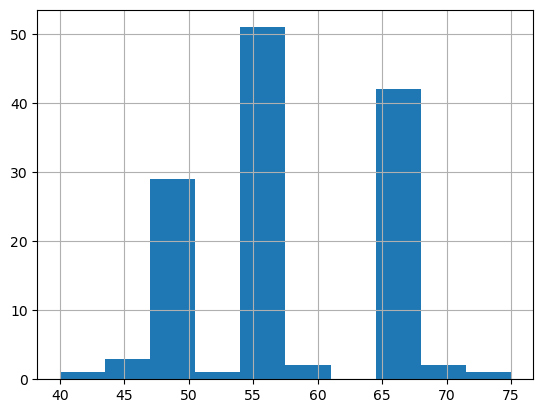

In [324]:
cheap_tv.hist()

<AxesSubplot:>

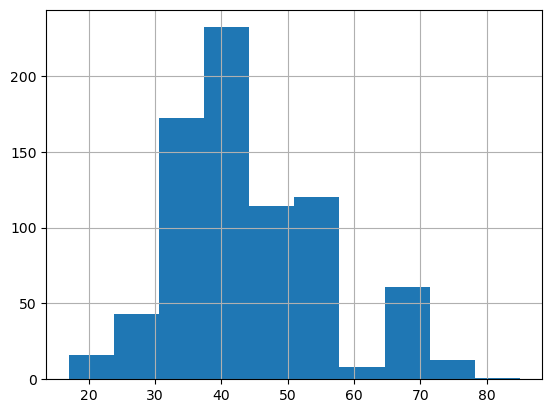

In [325]:
expensive_tv.hist()

In [326]:
#Распределение примерно нормальное

print(cheap_tv.var())
print(expensive_tv.var())

46.7918112421929
145.50843619367313


In [327]:
#Мы проверили дисперсию 
#Можно использовать классический критерий т-стьюдента

dof_student = len(cheap_tv) + len(expensive_tv) - 2
print(dof_student)

910


In [328]:
#Посчитаем с поправкой 

n_1 = len(expensive_tv)
n_2 = len(cheap_tv)
var_1 = expensive_tv.var()
var_2 = cheap_tv.var()
print(n_1, n_2, var_1, var_2)

780 132 145.50843619367313 46.7918112421929


In [329]:
v_1 = var_1 / n_1
v_2 = var_2 / n_2
dof_welch = (v_1 + v_2)**2 / (v_1**2/(n_1 - 1) + v_2**2/(n_2 - 1))
print(int(dof_welch))

291


In [330]:
#Критическое значение t-критерия: +-1.9667
#Критическая область: (-∞, -1.9667]U[1.9667, ∞)

In [331]:
def hypothesis_check(t, t_critical):
    if abs(t) > t_critical:
        print('Отвергаем Н0. Разница между средними статистически значима.')
    else:
            print('Не удалось отвергнуть Н0.')
            
t_critical = 1.9667

In [332]:
s_m1_m2 = np.sqrt(v_1 + v_2)
print(s_m1_m2)

0.735549247618973


In [333]:
mean_1 = expensive_tv.mean()
mean_2 = cheap_tv.mean()
print(mean_1, mean_2)

44.07948717948718 56.95454545454545


In [334]:
t = (mean_1 - mean_2) / s_m1_m2
print(t)

-17.504005770838297


In [335]:
hypothesis_check(t, t_critical)

Отвергаем Н0. Разница между средними статистически значима.


In [336]:
#Посчитаем значение по-другому

scipy.stats.ttest_ind_from_stats(mean_1, np.sqrt(var_1), n_1,
                                mean_2, np.sqrt(var_2), n_2, 
                                equal_var=False)

Ttest_indResult(statistic=-17.504005770838297, pvalue=2.1773539385969294e-47)

In [337]:
#Еще один быстрый способ

scipy.stats.ttest_ind(expensive_tv, cheap_tv, equal_var=False)

Ttest_indResult(statistic=-17.504005770838287, pvalue=2.1773539385970196e-47)

In [338]:
#На основе этих расчетов мы можем быть уверены, что по первому способу все вычислили правильно

CI_bottom = (mean_1 - mean_2) - t_critical*s_m1_m2
CI_top = (mean_1 - mean_2) + t_critical*s_m1_m2
print(CI_bottom)
print(CI_top)

-14.321662980350506
-11.428453569766038


In [339]:
#Мы нашли доверительный интервал 
#Разница между средними находится в нем

# Линейная регрессия

In [340]:
tv.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating,Big,Expensive
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3,1,0
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4,1,1
2,realme,HD LED,32,13999,17999,Android,4.3,0,0
3,Mi,HD LED,32,14999,19999,Android,4.4,0,0
4,realme,HD LED,32,12999,21999,Android,4.3,0,0


In [341]:
#Для рассчетов нам нужно привести датасет в нужный вид 

big_sum = tv.groupby(tv['Brand'])['Big'].sum()
size_mean = tv.groupby(tv['Brand'])['Size '].mean()
price_mean = tv.groupby(tv['Brand'])['Original Price'].mean()
rating_mean = tv.groupby(tv['Brand'])['Rating'].mean()

bigtv = pd.concat([big_sum, size_mean, price_mean, rating_mean], axis=1)
bigtv.head()

,Big,Size,Original Price,Rating
Brand,,,,
AISEN,2,42.500000,41190.000000,3.3
Acer,4,46.000000,43434.444444,3.9
Adsun,2,38.714286,27713.285714,3.8
Akai,5,54.500000,82190.000000,NaN
BPL,2,45.000000,48999.750000,3.7


In [342]:
bigtv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, AISEN   to realme 
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Big             59 non-null     int64  
 1   Size            59 non-null     float64
 2   Original Price  59 non-null     float64
 3   Rating          53 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.3+ KB


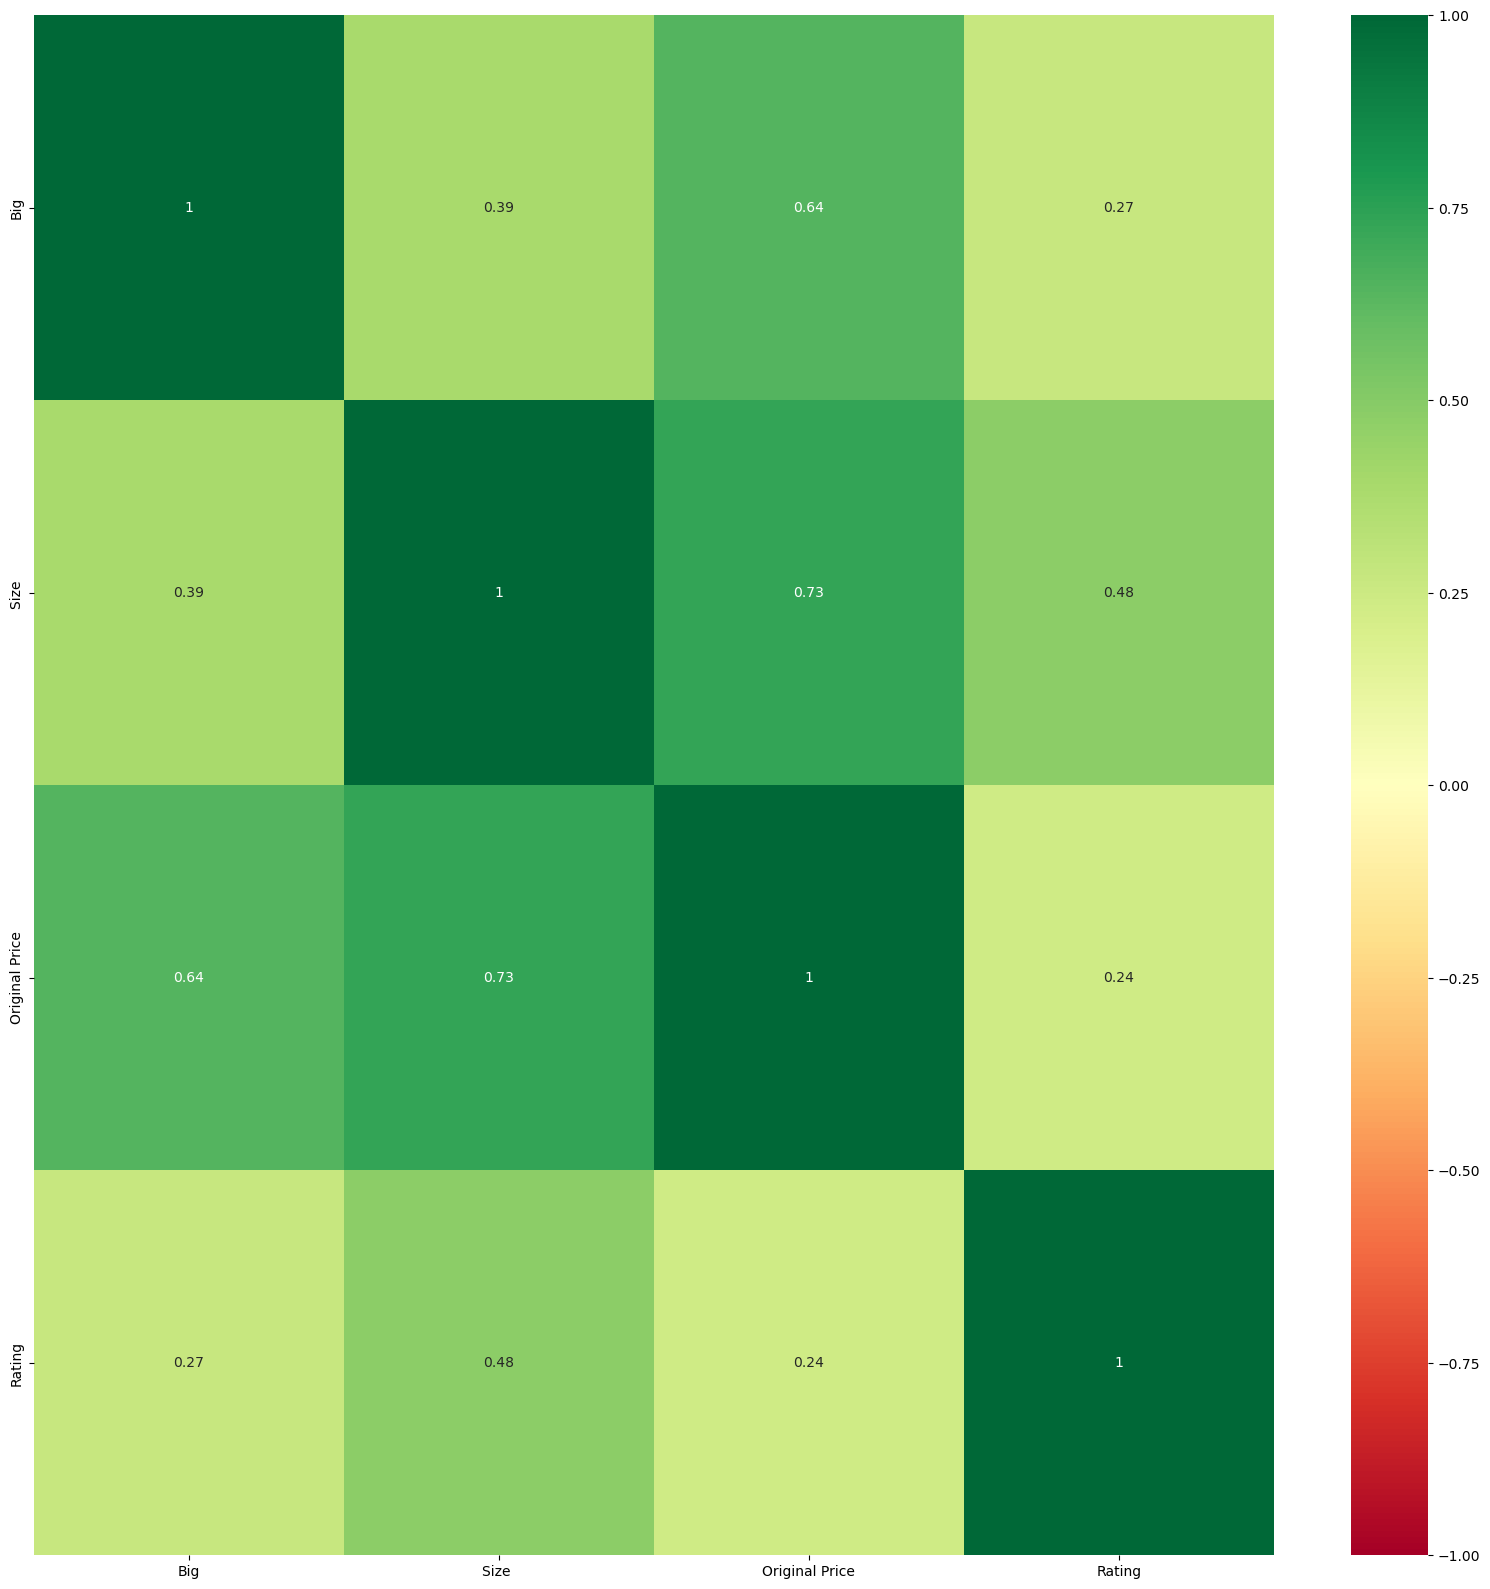

In [343]:
#Проверим предпосылки до построения модели 

plt.figure(figsize=(20,20))
p=sns.heatmap(bigtv.corr(), annot=True, cmap='RdYlGn', vmin=-1, vmax=1)

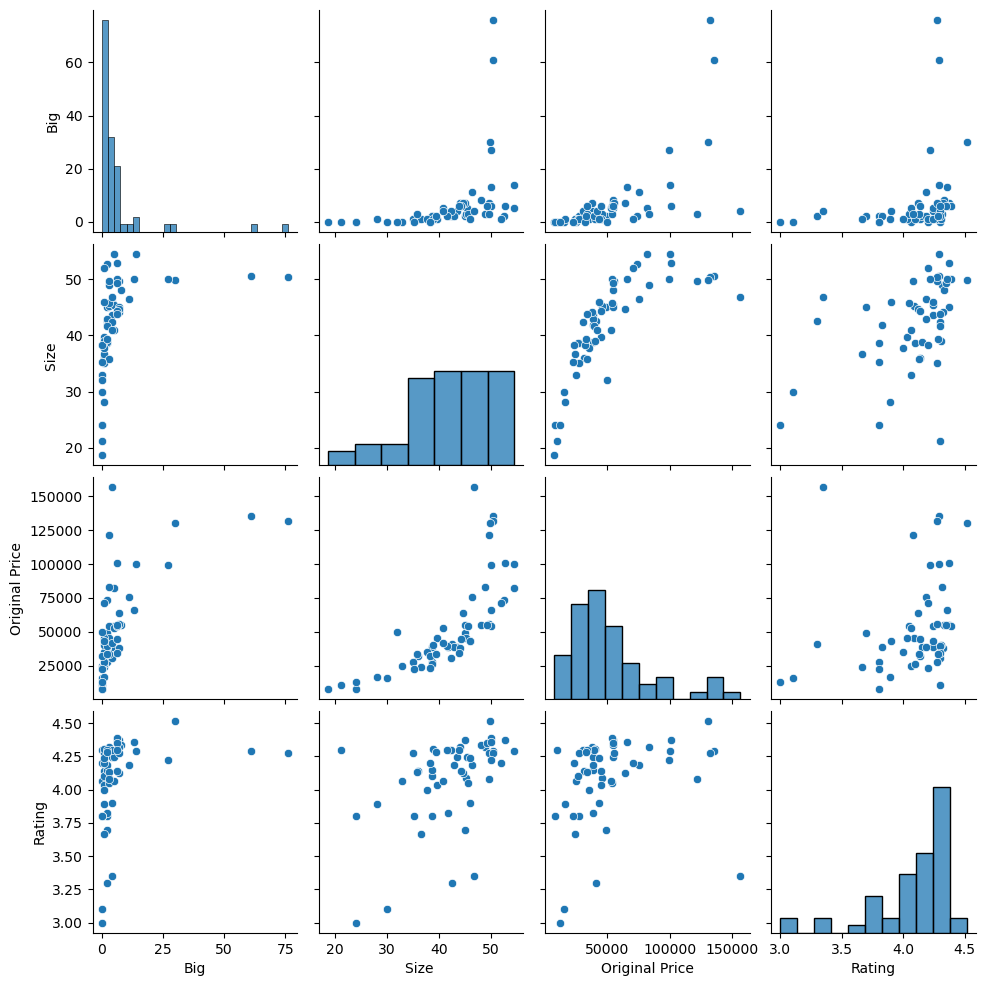

In [344]:
#Мы видим, что сильных корреляций нет, поэтому строить регрессию можно 

sns.pairplot(bigtv)

In [349]:
#Видим, что линейные зависимости есть, поэтому линейная модель нам подойдет

X = bigtv['Original Price']
y = bigtv['Big']

res = scipy.stats.linregress(X, y)
print(res)

LinregressResult(slope=0.000251109056596569, intercept=-6.7421231075019845, rvalue=0.6434378201746968, pvalue=3.877388851024064e-08, stderr=3.956968935378404e-05, intercept_stderr=2.4487590912734065)


In [350]:
r_sq = res.rvalue ** 2
print(r_sq)

0.4140122284311654


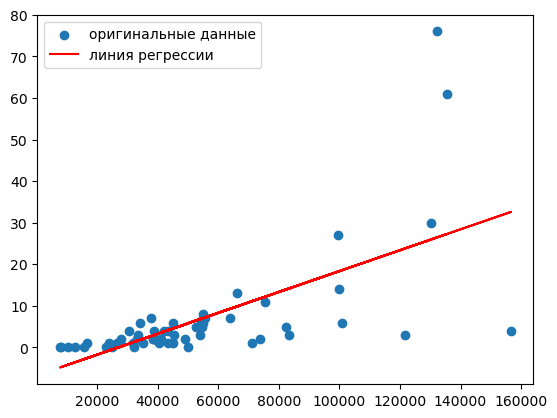

In [351]:
#Коэффициент детерминации небольшой
#Это говорит о том, что наша модель будет не очень качественной

plt.scatter(X, y, label = 'оригинальные данные')
plt.plot(X, res.intercept + res.slope * X, 'r', label = 'линия регрессии')
plt.legend()
plt.show()

In [353]:
#Мы построили линейную регрессию для количества больших телевизоров и цены 
#Теперь сделаем с несколькими предикторами

X_simple = bigtv['Original Price']
y = bigtv['Big']
X_simple_constant = sm.add_constant(X_simple)

model = sm.OLS(y, X_simple_constant)
res_simple = model.fit()
print(res_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                    Big   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     40.27
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           3.88e-08
Time:                        22:05:39   Log-Likelihood:                -219.08
No. Observations:                  59   AIC:                             442.2
Df Residuals:                      57   BIC:                             446.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -6.7421      2.449     -2.

In [354]:
X_mult = sm.add_constant(bigtv.drop('Big', axis=1))
X_mult

,const,Size,Original Price,Rating
Brand,,,,
AISEN,1.0,42.500000,41190.000000,3.300000
Acer,1.0,46.000000,43434.444444,3.900000
Adsun,1.0,38.714286,27713.285714,3.800000
Akai,1.0,54.500000,82190.000000,NaN
BPL,1.0,45.000000,48999.750000,3.700000
Blaupunkt,1.0,43.600000,38832.933333,4.242857
Candes,1.0,32.916667,24923.333333,4.066667
CloudWalker,1.0,45.222222,45491.111111,4.088889
Compaq,1.0,49.000000,83197.200000,4.320000


In [359]:
#При построении множественной линейной регрессии возникла ошибка
#Ошибка показывается неспроста. Имеющиеся значения не позволяют сделать регрессионную модель 
#Если посмотреть на результаты при двух переменных, внизу в выводах написано, что в датасете могут быть проблемы с данными (недостающие числа, например)
#Также, коэффициент детерминации слишком низкий, что говорит о низком качестве регрессионной модели 
#При этих условиях чем больше предикторов мы добавляем, тем хуже модель получаем

# Логистическая регрессия

In [360]:
#Для начала, как обычно, подготовим данные 
#Снова выделим числовые данные с учетом новых столбцов 

cols_num = ['Size', 'Selling Price', 'Original Price', 'Rating', 'Big', 'Expensive']

In [374]:
#Построим регрессию с одним предиктором 

X_simp = tv['Expensive']
y = tv['Big']
X_simp_constant = sm.add_constant(X_simp)

model = sm.OLS(y, X_simp_constant)
res_simp = model.fit()
print(res_simp.summary())

                            OLS Regression Results                            
Dep. Variable:                    Big   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     104.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           3.42e-23
Time:                        22:52:43   Log-Likelihood:                -598.33
No. Observations:                 912   AIC:                             1201.
Df Residuals:                     910   BIC:                             1210.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3474      0.017     20.785      0.0

In [376]:
np.exp(0.3474)

1.4153827652610078

In [377]:
np.exp(0.4480)

1.5651786956535216

In [378]:
#Если константа будет равна 0, то вероятность, что нам попадется дорогой телевизор, мала
#Если будет 1, то шансы повышаются 

df.groupby('Expensive')['Big'].value_counts().unstack()

Big,0,1
Expensive,,
0,509,271
1,27,105


In [380]:
p_1_small = 27 / (27 + 509)
p_0_small = 1 - p_1_small
odds_1_small = p_1_small / p_0_small
print(odds_1_small)
print(np.log(odds_1_small))

0.05304518664047151
-2.936611150546194


In [389]:
#При построении модели с несколькими предикторами снова появляется ошибка 
#Все из-за маленького коэффициента детерминации 
#Получилось построить только простые модели, что тоже объясняет логику и позволяет понять материал 
#Данный кейс показывает, что перед построением моделей регрессий необходимо проверять все предпосылки 
#Корелляция между переменными очень важна, а также коэффициент детерминации 
#Это поможет понять, насколько модель регрессии будет вообще уместна